# No-show 발생률을 줄일 수 있는 아이디어?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

## 1. 데이터 로딩

In [3]:
file_path = './Data01/'
file_list = os.listdir(file_path)
print(file_list)

['medical.csv']


In [4]:
df_rawdata_medical = pd.read_csv(file_path+file_list[0])
df_rawdata_medical.info()
df_rawdata_medical.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


## 2. 기초 통계와 Na값 확인

In [105]:
df_rawdata_medical.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,88208
mean,1.474961e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.321026,NaN
std,2.560943e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.466873,NaN
min,3.920000e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,NaN
25%,4.170000e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,NaN
50%,3.170000e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,NaN
75%,9.440000e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,1.000000,NaN


In [106]:
# 열별 행방향 중 하나라도 널값이 있는지 조사
pd.concat([df_rawdata_medical.isnull().sum(), df_rawdata_medical.isnull().any(axis=0)], axis=1)

,0,1
PatientId,0,False
AppointmentID,0,False
Gender,0,False
ScheduledDay,0,False
AppointmentDay,0,False
Age,0,False
Neighbourhood,0,False
SMS_received,0,False
No-show,0,False


In [107]:
 # 행별 열방향 중 하나라도 널값이 있는지 조사
pd.concat([df_rawdata_medical.T.isna().sum(), df_rawdata_medical.isna().any(axis=1)], axis=1)


,0,1
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False
...,...,...
110522,0,False
110523,0,False
110524,0,False
110525,0,False


## 3. 데이터 전처리
 - 파생변수(새로운 변수) 생성
 - 이상치 제거

### 3-1. 나이의 이상값 제거

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


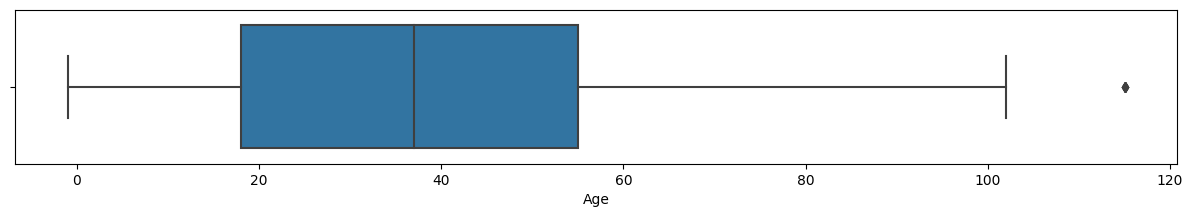

In [165]:
print(df_rawdata_medical.Age.describe())

fig, ax = plt.subplots()
fig.set_size_inches(15,2)
sns.boxplot(x = df_rawdata_medical.Age) 
plt.show()

In [164]:
# 나이의 최소 이상값 제거: 상식에 근거함
outlier_age_idx = df_rawdata_medical[df_rawdata_medical.Age < 0].index
df_rawdata_medical.Age[outlier_age_idx]

99832   -1
Name: Age, dtype: int64

In [168]:
df_mod00_medical = df_rawdata_medical.drop(outlier_age_idx, axis=0)
df_mod00_medical.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [169]:
# 나이의 최소 이상값 제거: 상식에 근거함
def detect_outlier(sr): #Series로 입력
    sr_desc = sr.describe()
    temp_Q1 = sr_desc[4]
    temp_Q1_numpy = np.percentile(sr, 25)
    temp_Q3 = sr_desc[6]
    temp_Q3_numpy = np.percentile(sr, 75)
    # IQR: Q3-Q1
    temp_IQR = temp_Q3 - temp_Q1
    # 최소값: Q1-1.5*IQR, 최대값: Q3+1.5*IQR
    temp_min = temp_Q1 - (1.5*temp_IQR)
    temp_max = temp_Q3 + (1.5*temp_IQR)
    print(f'Q1: {temp_Q1}, {temp_Q1_numpy}\nQ3: {temp_Q3}, {temp_Q3_numpy}')
    print(f'IQR(InterQuantile Range): {temp_IQR}')
    print(f'Box min: {temp_min}, Box max: {temp_max}')
    outlier_idx = sr[(sr < temp_min) | (sr > temp_max)].index
    return outlier_idx

outlier_idx = detect_outlier(df_mod00_medical.Age)
print(outlier_idx)
df_mod00_medical.Age[outlier_idx]

Q1: 18.0, 18.0
Q3: 55.0, 55.0
IQR(InterQuantile Range): 37.0
Box min: -37.5, Box max: 110.5
Int64Index([63912, 63915, 68127, 76284, 97666], dtype='int64')


63912    115
63915    115
68127    115
76284    115
97666    115
Name: Age, dtype: int64

In [170]:
df_mod01_medical = df_mod00_medical.drop(outlier_idx, axis=0)
df_mod01_medical.Age.describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [171]:
pd.concat([df_rawdata_medical.Age.describe(), df_mod00_medical.Age.describe(), df_mod01_medical.Age.describe()], axis=1)

,Age,Age,Age
count,110527.000000,110526.000000,110521.000000
mean,37.088874,37.089219,37.085694
std,23.110205,23.110026,23.104606
min,-1.000000,0.000000,0.000000
25%,18.000000,18.000000,18.000000
50%,37.000000,37.000000,37.000000
75%,55.000000,55.000000,55.000000
max,115.000000,115.000000,102.000000


### 3-2. No-Show 값을 Binary 숫자로 변경

In [174]:
df_mod01_medical['No-show'].value_counts()

No     88205
Yes    22316
Name: No-show, dtype: int64

In [179]:
df_mod02_medical = df_mod01_medical.copy()

In [180]:
# Series의 Map을 활용
df_mod02_medical['No-show'] = df_mod02_medical['No-show'].map({'Yes':1,'No':0})

# Series의 str.replace를 활용
# df_mod02_medical['No-show'] = df_mod02_medical['No-show'].str.replace('Yes', '1', regex=False)
# df_mod02_medical['No-show'] = df_mod02_medical['No-show'].str.replace('No', '0', regex=False)

# # boolean indexing를 활용
# df_mod02_medical.iloc[df_mod02_medical['No-show'] == 'Yes', 8] = 1
# df_mod02_medical.iloc[df_mod02_medical['No-show'] == 'No', 8] = 0

In [185]:
df_mod02_medical['No-show'].value_counts()

0    88205
1    22316
Name: No-show, dtype: int64

### 3-3. 병원예약일과 실제방문일을 활용한 파생변수 생성
 - 예약일(Scheduled)과 실제방문(Appointment)일별 노쇼 현황 분석
 - 예약일과 실제방문일 차이가 클수록 No-show가 증가? 

In [242]:
df_mod03_medical = df_mod02_medical.copy()

In [243]:
df_mod03_medical.info()
df_mod03_medical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   SMS_received    110521 non-null  int64  
 8   No-show         110521 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 12.5+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,0
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0
...,...,...,...,...,...,...,...,...,...
110522,2.570000e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,1,0
110523,3.600000e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,1,0
110524,1.560000e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,1,0
110525,9.210000e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,1,0


In [244]:
df_mod03_medical['AppointmentDay']=pd.to_datetime(df_mod03_medical['AppointmentDay'])
df_mod03_medical['ScheduledDay']=pd.to_datetime(df_mod03_medical['ScheduledDay'])

In [245]:
df_mod03_medical.info()
df_mod03_medical.ScheduledDay[0], df_mod03_medical.AppointmentDay[0]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  float64            
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Neighbourhood   110521 non-null  object             
 7   SMS_received    110521 non-null  int64              
 8   No-show         110521 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 12.5+ MB


(Timestamp('2016-04-29 18:38:08+0000', tz='UTC'),
 Timestamp('2016-04-29 00:00:00+0000', tz='UTC'))

In [246]:
# 데이터 타입 변환 후 데이터 확인 시 Appointment가 항상 Scheduled보다 뒤에 있어야 함 날짜기준?
pd.concat([df_mod03_medical.ScheduledDay, df_mod03_medical.AppointmentDay], axis=1)

,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00
...,...,...
110522,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00
110523,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00
110524,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00
110525,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00


In [249]:
# dt.dayofyear를 이용하여 해당 날짜의 일년 중 일자를 도출
pd.concat([df_mod03_medical.ScheduledDay, df_mod03_medical.ScheduledDay.dt.dayofyear, df_mod03_medical.AppointmentDay, df_mod03_medical.AppointmentDay.dt.dayofyear], axis=1)

,ScheduledDay,ScheduledDay,AppointmentDay,AppointmentDay
0,2016-04-29 18:38:08+00:00,120,2016-04-29 00:00:00+00:00,120
1,2016-04-29 16:08:27+00:00,120,2016-04-29 00:00:00+00:00,120
2,2016-04-29 16:19:04+00:00,120,2016-04-29 00:00:00+00:00,120
3,2016-04-29 17:29:31+00:00,120,2016-04-29 00:00:00+00:00,120
4,2016-04-29 16:07:23+00:00,120,2016-04-29 00:00:00+00:00,120
...,...,...,...,...
110522,2016-05-03 09:15:35+00:00,124,2016-06-07 00:00:00+00:00,159
110523,2016-05-03 07:27:33+00:00,124,2016-06-07 00:00:00+00:00,159
110524,2016-04-27 16:03:52+00:00,118,2016-06-07 00:00:00+00:00,159
110525,2016-04-27 15:09:23+00:00,118,2016-06-07 00:00:00+00:00,159


In [250]:
# 차이를 통해서 대시 기간(일자)를 도출 이때 대기일자는 무조건 양수여야 함
df_mod03_medical['waiting_day'] = df_mod03_medical.AppointmentDay.dt.dayofyear - df_mod03_medical.ScheduledDay.dt.dayofyear
df_mod03_medical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110521 non-null  float64            
 1   AppointmentID   110521 non-null  int64              
 2   Gender          110521 non-null  object             
 3   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 5   Age             110521 non-null  int64              
 6   Neighbourhood   110521 non-null  object             
 7   SMS_received    110521 non-null  int64              
 8   No-show         110521 non-null  int64              
 9   waiting_day     110521 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(2)
memory usage: 13.3+ MB


In [252]:
df_mod03_medical.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474919e+14,5.675304e+06,37.085694,0.321034,0.201916,9.978963
std,2.560922e+14,7.129576e+04,23.104606,0.466876,0.401432,15.607577
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,-223.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680569e+06,37.000000,0.000000,0.000000,4.000000
75%,9.440000e+13,5.725523e+06,55.000000,1.000000,0.000000,15.000000
max,1.000000e+15,5.790484e+06,102.000000,1.000000,1.000000,146.000000


In [254]:
# 음수존재 확인 양수조건만 전처리로 도출
df_mod04_medical = df_mod03_medical[df_mod03_medical.waiting_day >= 0].reset_index(drop=True)

In [255]:
# 데이터 전처리 완료
df_mod04_medical.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.104540e+05,1.104540e+05,110454.000000,110454.000000,110454.000000,110454.000000
mean,1.474835e+14,5.675603e+06,37.071197,0.320839,0.201822,10.096800
std,2.560762e+14,7.018446e+04,23.099848,0.466801,0.401362,14.803272
min,3.920000e+04,5.209081e+06,0.000000,0.000000,0.000000,0.000000
25%,4.170000e+12,5.640348e+06,18.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680610e+06,37.000000,0.000000,0.000000,4.000000
75%,9.440000e+13,5.725554e+06,55.000000,1.000000,0.000000,15.000000
max,1.000000e+15,5.790484e+06,102.000000,1.000000,1.000000,146.000000


In [256]:
df_mod04_medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110454 entries, 0 to 110453
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110454 non-null  float64            
 1   AppointmentID   110454 non-null  int64              
 2   Gender          110454 non-null  object             
 3   ScheduledDay    110454 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110454 non-null  datetime64[ns, UTC]
 5   Age             110454 non-null  int64              
 6   Neighbourhood   110454 non-null  object             
 7   SMS_received    110454 non-null  int64              
 8   No-show         110454 non-null  int64              
 9   waiting_day     110454 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(2)
memory usage: 8.4+ MB


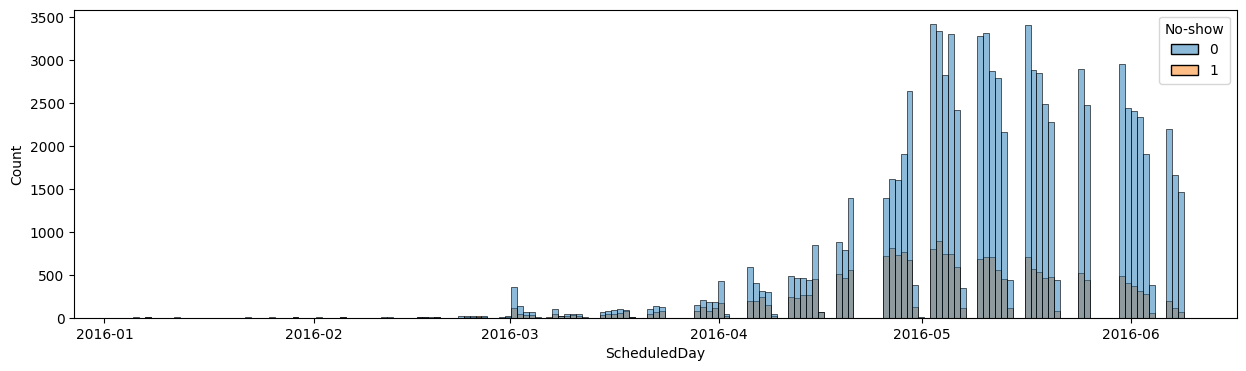

In [264]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.histplot(data=df_mod04_medical, x='ScheduledDay', hue='No-show')

plt.show()

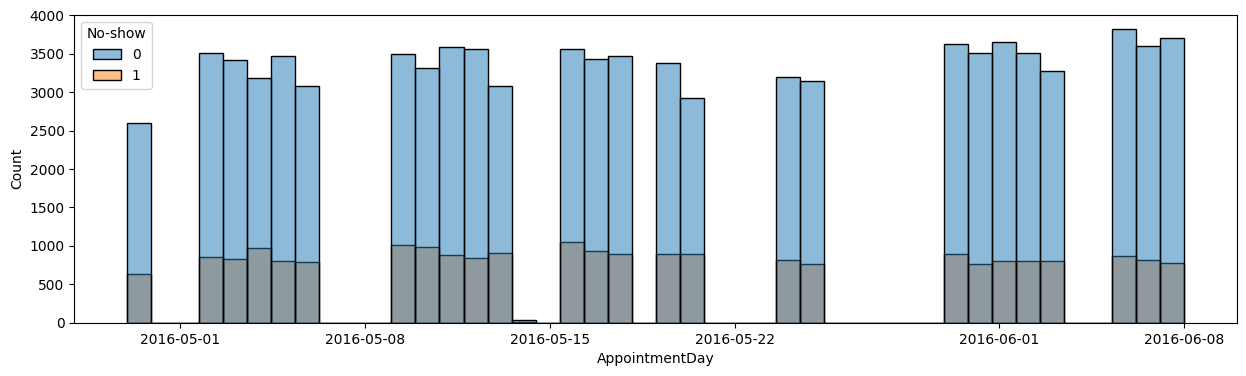

In [266]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.histplot(data=df_mod04_medical, x='AppointmentDay', hue='No-show')

plt.show()

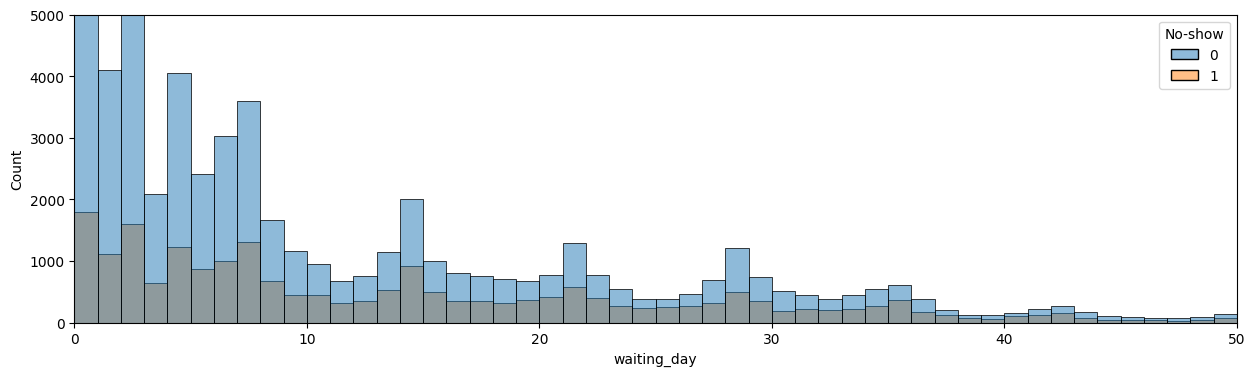

In [219]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.histplot(data=df_mod04_medical, x='waiting_day', hue='No-show', bins=df_mod04_medical.waiting_day.max())
ax.set_xlim(0, 50)
ax.set_ylim(0, 5000)

plt.show()

In [273]:
df_group_result = df_mod04_medical.groupby(['waiting_day'])['No-show'].agg(['sum', 'count']).reset_index()
df_group_result['No_show_ratio'] = df_group_result['sum'] / df_group_result['count']
df_group_result

,waiting_day,sum,count,No_show_ratio
0,0,1792,38561,0.046472
1,1,1113,5213,0.213505
2,2,1602,6725,0.238216
3,3,642,2735,0.234735
4,4,1231,5290,0.232703
...,...,...,...,...
118,132,1,1,1.000000
119,133,4,11,0.363636
120,139,1,1,1.000000
121,142,2,2,1.000000


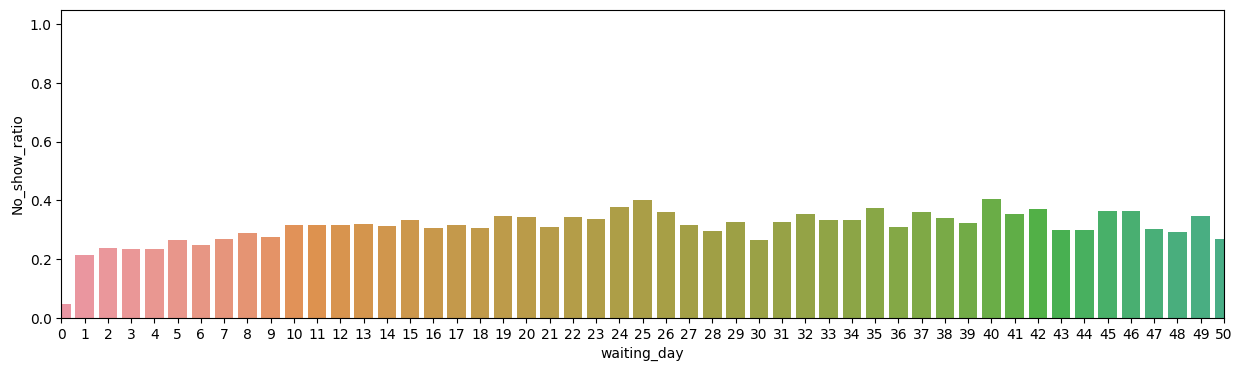

In [276]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.barplot(data=df_group_result, x='waiting_day', y='No_show_ratio')
ax.set_xlim(0, 50)

plt.show()

In [277]:
df_group01_result = df_mod04_medical.groupby(['PatientId'])['No-show'].agg(['sum', 'count']).sort_values(by='count',ascending=False).reset_index()
df_group01_result['No_show_ratio'] = df_group01_result['sum'] / df_group01_result['count']
df_group01_result

,PatientId,sum,count,No_show_ratio
0,8.220000e+14,11,141,0.078014
1,3.350000e+13,6,127,0.047244
2,7.580000e+13,21,124,0.169355
3,8.190000e+13,17,123,0.138211
4,2.690000e+13,8,117,0.068376
...,...,...,...,...
6095,7.692837e+10,0,1,0.000000
6096,3.674982e+10,0,1,0.000000
6097,3.679254e+10,0,1,0.000000
6098,7.682627e+10,0,1,0.000000


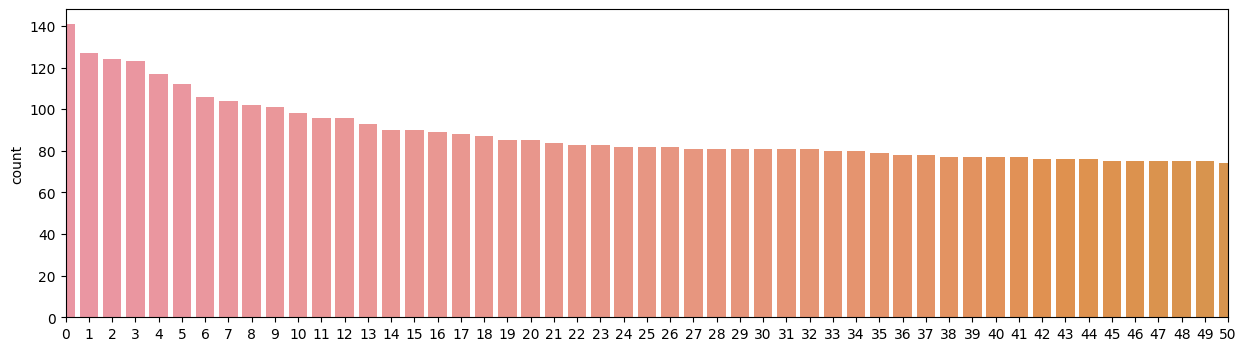

In [289]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

df_data_sample = df_group01_result.iloc[0:500,:]

sns.barplot(data=df_data_sample, x=df_data_sample.index, y='count')
ax.set_xlim(0, 50)

plt.show()

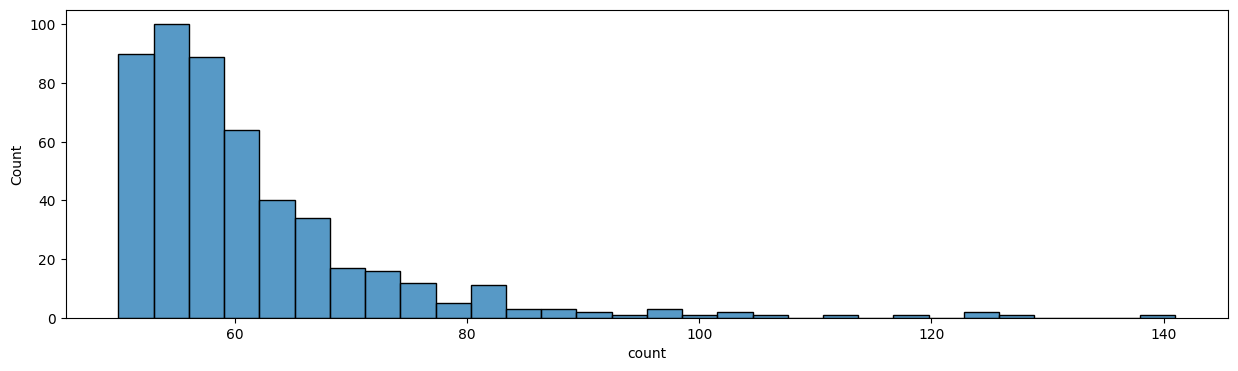

In [293]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

df_data_sample = df_group01_result.iloc[0:500,:]

sns.histplot(data=df_data_sample, x='count', bins=30)

plt.show()

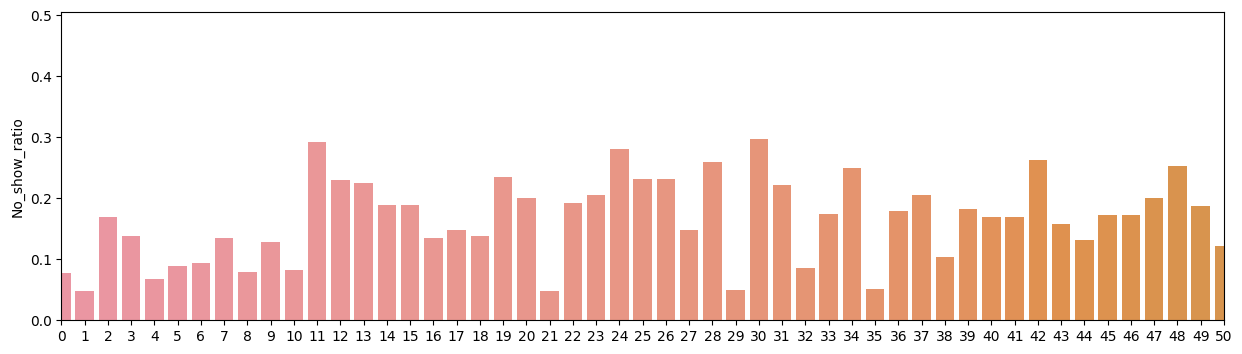

In [288]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

df_data_sample = df_group01_result.iloc[0:500,:]

sns.barplot(data=df_data_sample, x=df_data_sample.index, y='No_show_ratio')
ax.set_xlim(0, 50)

plt.show()

In [298]:
df_group02_result = df_mod04_medical.groupby(['PatientId', 'waiting_day'])['No-show'].agg(['sum', 'count']).sort_values(by='count',ascending=False).reset_index()
df_group02_result['No_show_ratio'] = df_group02_result['sum'] / df_group02_result['count']
df_group02_result

,PatientId,waiting_day,sum,count,No_show_ratio
0,8.220000e+14,0,1,99,0.010101
1,3.350000e+13,0,0,93,0.000000
2,2.690000e+13,0,0,88,0.000000
3,9.963767e+10,0,1,81,0.012346
4,8.920000e+13,0,5,75,0.066667
...,...,...,...,...,...
51773,6.650000e+12,17,1,1,1.000000
51774,6.650000e+12,23,0,1,0.000000
51775,6.650000e+12,28,0,1,0.000000
51776,6.650000e+12,35,0,1,0.000000


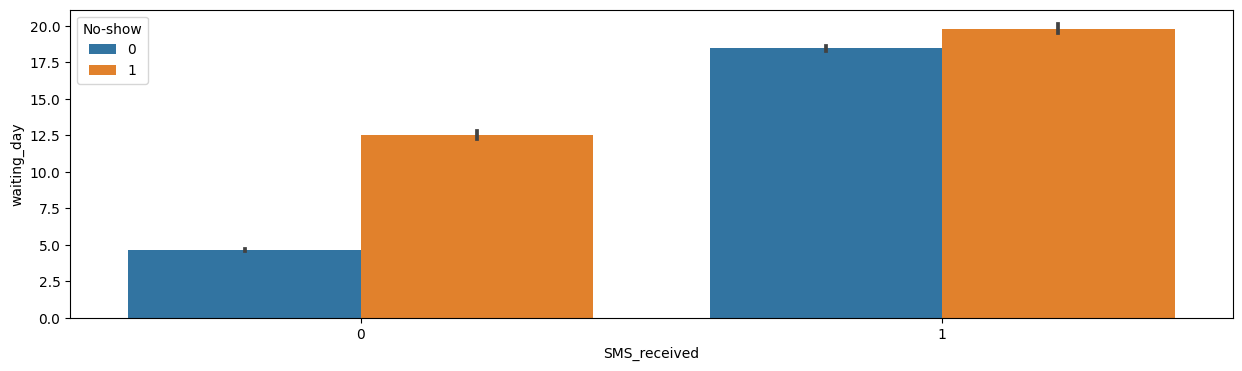

In [300]:
fig, ax = plt.subplots()
fig.set_size_inches(15,4)

sns.barplot(data=df_mod04_medical, x='SMS_received', y='waiting_day', hue='No-show')

plt.show()

In [301]:
df_group03_result = df_mod04_medical.groupby(['SMS_received'])['No-show'].agg(['sum', 'count']).reset_index()
df_group03_result['No_show_ratio'] = df_group03_result['sum'] / df_group03_result['count']
df_group03_result

,SMS_received,sum,count,No_show_ratio
0,0,12522,75016,0.166924
1,1,9770,35438,0.275693


In [22]:
a=df[df.waiting_day==0]['waiting_day'].value_counts()
b=df[(df['waiting_day']==0)&(df['No-show']==1)]['waiting_day'].value_counts()
b/a

0    0.046472
Name: waiting_day, dtype: float64

In [23]:
no_show=df[df['No-show']==1]
show=df[df['No-show']==0]

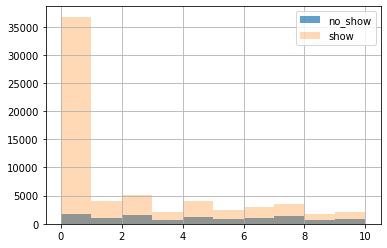

In [24]:
no_show[no_show['waiting_day']<=10]['waiting_day'].hist(alpha=0.7,label='no_show')
show[show['waiting_day']<=10]['waiting_day'].hist(alpha=0.3,label='show')
plt.legend()

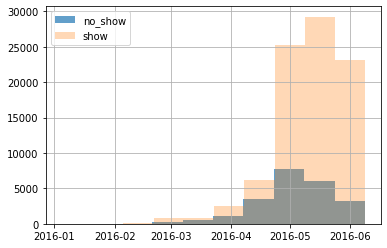

In [25]:
no_show['ScheduledDay'].hist(alpha=0.7,label='no_show')
show['ScheduledDay'].hist(alpha=0.3,label='show')
plt.legend()

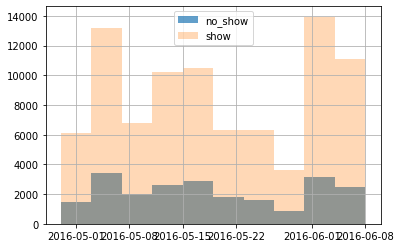

In [26]:
no_show['AppointmentDay'].hist(alpha=0.7,label='no_show')
show['AppointmentDay'].hist(alpha=0.3,label='show')
plt.legend()

In [27]:
df.PatientId.value_counts().iloc[0:10]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: PatientId, dtype: int64

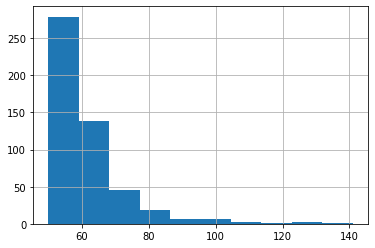

In [53]:
df.PatientId.value_counts().iloc[0:500].hist()

In [54]:
df.PatientId.value_counts().iloc[0:500]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
4.170000e+14     50
9.590000e+14     50
7.220000e+13     50
2.730000e+12     50
3.690000e+13     50
Name: PatientId, Length: 500, dtype: int64

In [55]:
df[(df['waiting_day']>=50) & (df['No-show']==1)].PatientId.value_counts().iloc[0:10]

3.380000e+14    6
7.250000e+13    4
7.850000e+13    4
8.340000e+12    4
5.670000e+12    3
2.590000e+13    3
9.630000e+14    3
4.970000e+12    3
9.460000e+14    3
3.370000e+13    3
Name: PatientId, dtype: int64

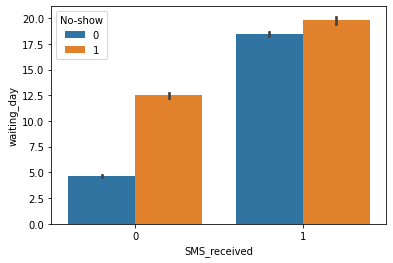

In [56]:
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=df)

In [70]:
a=len(df[(df['SMS_received']==0) & (df['No-show']==1)])
b=len(df[(df['SMS_received']==0) & (df['No-show']==0)])
print(f'SMS_received가 0일때 노쇼:{a}')
print(f'SMS_received가 0일때 쇼:{b}')
print(f'SMS_received가 0일때 노쇼비율:{a/(a+b)}')
c=len(df[(df['SMS_received']==1) & (df['No-show']==1)])
d=len(df[(df['SMS_received']==1) & (df['No-show']==0)])
print(f'SMS_received가 1일때 노쇼:{c}')
print(f'SMS_received가 1일때 쇼:{d}')
print(f'SMS_received가 1일때 노쇼비율:{c/(c+d)}')

SMS_received가 0일때 노쇼:12522
SMS_received가 0일때 쇼:62494
SMS_received가 0일때 노쇼비율:0.1669243894635811
SMS_received가 1일때 노쇼:9770
SMS_received가 1일때 쇼:25668
SMS_received가 1일때 노쇼비율:0.2756927591850556


In [72]:
9770/25668

0.38062957768427613

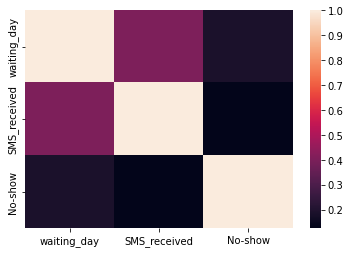

In [64]:
temp=df[['waiting_day','SMS_received','No-show']].corr()
sns.heatmap(temp)

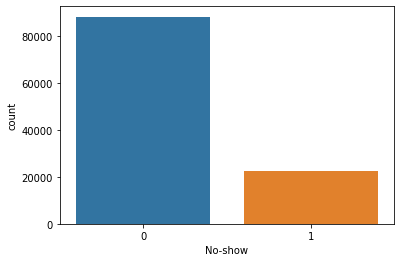

In [73]:
sns.countplot(x='No-show',data=df)

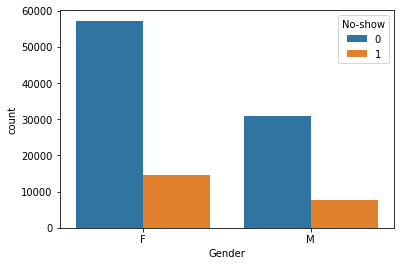

In [74]:
sns.countplot(x='Gender',hue='No-show',data=df)

In [76]:
여성인원수= df[(df['Gender']=='F') & (df['No-show']==1)]['Gender'].value_counts()
남성인원수=df[(df['Gender']=='M') & (df['No-show']==1)]['Gender'].value_counts()
전체여성수=df[df["Gender"]=='F']['Gender'].value_counts()

전체남성수=df[df["Gender"]=='M']['Gender'].value_counts()
print(여성인원수/전체여성수)
print(남성인원수/전체남성수)

F    0.203062
Name: Gender, dtype: float64
M    0.199519
Name: Gender, dtype: float64


1.얼마나 많은 환자가 예정된 시간에 오지 않았는가?

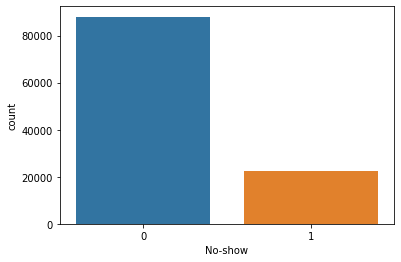

In [ ]:
sns.countplot(x='No-show', data=df)

쇼/노쇼 환자의 성별 분포는 어떻게 되는가?

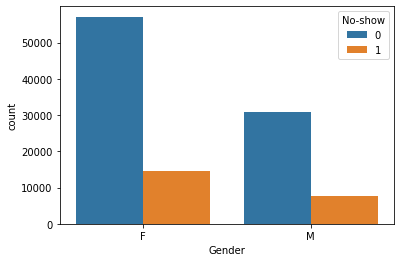

In [ ]:
sns.countplot(x='Gender', hue='No-show',data=df)

In [ ]:
df[(df['Gender']=='F') & (df['No-show']==1)]['Gender'].value_counts()

F    14551
Name: Gender, dtype: int64

In [ ]:
df[(df['Gender']=='M') & (df['No-show']==1)]['Gender'].value_counts()

M    7700
Name: Gender, dtype: int64

In [ ]:
df[(df['Gender']=='F')]['Gender'].value_counts()

F    71677
Name: Gender, dtype: int64

In [ ]:
df[(df['Gender']=='M')]['Gender'].value_counts()

M    38578
Name: Gender, dtype: int64

In [ ]:
14551/71677

0.2030079383902786

In [ ]:
8800/38578

0.22810928508476333

여성의 경우 20% 노쇼,
남성의 경우 22% 노쇼
-> 성별이 영향을 주진 않는다.